<a href="https://colab.research.google.com/github/codholic/multiclass_-classification_Chinese_zodiac_animals/blob/master/Chinese_Zodiac_Animal_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
!unzip signs.zip

Archive:  signs.zip
replace signs/valid/pig/00000563.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: signs/valid/pig/00000563.jpg  
  inflating: signs/valid/pig/00000205.jpg  
  inflating: signs/valid/pig/00000211.jpg  
  inflating: signs/valid/pig/00000577.jpg  
  inflating: signs/valid/pig/00000588.jpg  
  inflating: signs/valid/pig/00000742.jpeg  
  inflating: signs/valid/pig/00000589.jpg  
  inflating: signs/valid/pig/00000210.jpg  
  inflating: signs/valid/pig/00000576.jpg  
  inflating: signs/valid/pig/00000562.jpg  
  inflating: signs/valid/pig/00000238.jpg  
  inflating: signs/valid/pig/00000200.jpeg  
  inflating: signs/valid/pig/00000650.jpeg  
  inflating: signs/valid/pig/00000012.jpg  
  inflating: signs/valid/pig/00000760.jpg  
  inflating: signs/valid/pig/00000199.jpg  
  inflating: signs/valid/pig/00000600.jpg  
  inflating: signs/valid/pig/00000166.jpg  
  inflating: signs/valid/pig/00000172.jpg  
  inflating: signs/valid/pig/00000614.jpg  
  inflating: signs/

In [0]:
import os
os.chdir("/content/drive/My Drive/")

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
data_dir = 'signs'

batch_size = 20


#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

val_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

#  Preparing datasets
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
val_data = datasets.ImageFolder(data_dir + '/valid', transform=val_transforms)

 


#specifying image classes
Class=[' Rat', 'Ox', 'Tiger', 'Rabbit', 'Dragon', 'Snake', 'Horse', 'Goat', 'Monkey', 'Rooster', 'Dog', 'Pig']

In [39]:
!pip install nonechucks
import nonechucks as nc
train_data_set = nc.SafeDataset(train_data)
test_data_set = nc.SafeDataset(test_data)
val_data_set = nc.SafeDataset(val_data)

In [40]:
#Dataloader 
trainloader = torch.utils.data.DataLoader(train_data_set, batch_size=batch_size,shuffle=True)
valloader = torch.utils.data.DataLoader(val_data_set, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(test_data_set, batch_size=batch_size)

print("trainset_length:", len(train_data_set), ", validationset_length:", len(validation_data_set), ", testset_length:", len(test_data_set))

trainset_length: 7197 , validationset_length: 650 , testset_length: 660


20


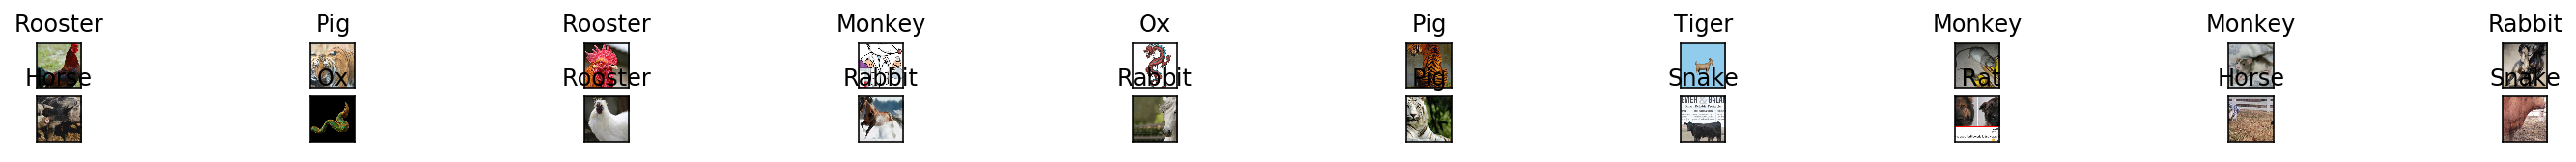

In [35]:
# not written by me
 
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

# obtain one batch of training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
print(len(images))

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(8, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(Class[labels[idx]])

In [36]:
#network = models.resnext101_32x8d(pretrained=True)
network = models.resnet152(pretrained=True)
print(network)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 230M/230M [00:03<00:00, 61.9MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
# to avoid recalculations again
for param in network.parameters():
  param.requires_grad=False

In [38]:
# write a new classifier, to get tweleve outputs only
from collections import OrderedDict
import torch.nn as nn
import torch.nn.functional as f

od = OrderedDict() 
od['in'] = nn.Linear(2048, 256)
od['a1'] = nn.ReLU()
od['d1'] = nn.Dropout(0.35)
od['l1'] = nn.Linear(256, 64)
od['a2'] = nn.ReLU()
od['d2'] = nn.Dropout(0.35)
od['l2'] = nn.Linear(64, 12)
od['softmax'] = nn.LogSoftmax(dim=1)

new_classifier = nn.Sequential(od)
for param in new_classifier.parameters():
  param.requires_grad=True

# set the new classifier
network.fc = new_classifier
print(network)

 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
train_on_gpu=torch.cuda.is_available
if (train_on_gpu):
  print("training on GPU")
  network.cuda()


